# Temperature Forecast Project using ML

## roblem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\tusha\Downloads\temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [4]:
# checking the shape of the dataset
df.shape

(7752, 25)

In [5]:
# there are 7752 rows and 25 columns

In [6]:
# checking the names of the columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
# checking the datatypes of the columns
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
# most of the columns are of float64 types datatypes and only one is of object type datatypes.

In [9]:
#Creating Datetime object and extracting day,month, year 

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df['Date_day'] = df['Date'].apply(lambda x: x.day)
df['Date_month'] = df['Date'].apply(lambda x: x.month)
df['Date_year'] = df['Date'].apply(lambda x: x.year)

In [12]:
df['Date'] = df['Date'].apply(lambda x: str(x).replace('-','').split()[0])

In [13]:
df['Date'] = df['Date'].apply(lambda x: np.NAN if x =='NaT'else x)

In [14]:
df.drop('Date',axis='columns',inplace=True)

In [15]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   
7750      NaN          20.0          11.3    19.794666    58.936283   
7751      NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936   6.818887   69.451805   0.233947   
1            29.850689         24.035009   5.691890   51.937448   0.225508   
2            30.091292         24.565633   6.138224   20.573050   0.209344   
3            29.704629         23.326177   5.650050   65.727144   0.216372   
4            29.113934         23.486480   5.735004  107.965535   0.151407   
...                ...               ...        ...         ...        ...   
7747         26.352081         18.775678   6.148918   72.058294   0.030034   
7748         27.010193         18.733519   6.542819   47.241457   0.035874   
7749         27.939516         18.522965   7.289264    9.090034   0.048954   
7750         17.624954         14.272646   2.882580  -13.603212   0.000000   
7751         38.542255         29.619342  21.857621  213.414006   0.967277   

      ...      lat      lon       DEM     Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.785000      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.514100      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.266100      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.534800      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.505500      5859.552246       31.2   
...   ...      ...      ...       ...       ...              ...        ...   
7747  ...  37.5372  126.891   15.5876  0.155400      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.222300      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.271300      4451.345215       27.8   
7750  ...  37.4562  126.826   12.3700  0.098475      4329.520508       17.4   
7751  ...  37.6450  127.135  212.3350  5.178230      5992.895996       38.9   

      Next_Tmin  Date_day  Date_month  Date_year  
0          21.2      30.0         6.0     2013.0  
1          22.5      30.0         6.0     2013.0  
2          23.9      30.0         6.0     2013.0  
3          24.3      30.0         6.0     2013.0  
4          22.5      30.0         6.0     2013.0  
...         ...       ...         ...        ...  
7747       18.1      30.0         8.0     2017.0  
7748       18.8      30.0         8.0     2017.0  
7749       17.4      30.0         8.0     2017.0  
7750       11.3       NaN         NaN        NaN  
7751       29.8       NaN         NaN        NaN  

[7752 rows x 27 columns]

### cheking the null values

In [16]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Date_day             2
Date_month           2
Date_year            2
dtype: int64

<AxesSubplot:title={'center':'Heatmap Null Values'}>

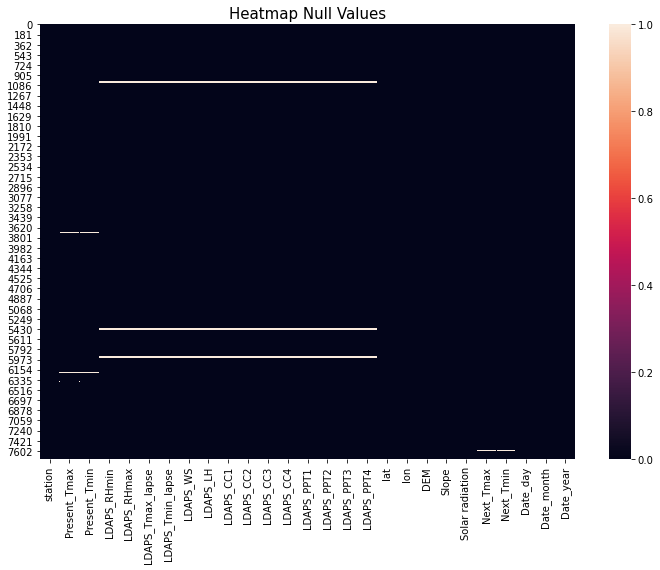

In [17]:
# checking the missing values using the heatmap
plt.figure(figsize=(12,8))
plt.title('Heatmap Null Values', fontsize=15)
sns.heatmap(df.isnull())

In [18]:
# it can be seen that there are missing values present in the dataset.

In [19]:
df.duplicated().sum()

0

In [20]:
# There are duplicate values present in the dataset.

In [21]:
# checking the count for each type of value
df.nunique()

station               25
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
Date_day              21
Date_month            12
Date_year              5
dtype: int64

In [22]:
# Filling up the missing values.
df=df.replace(np.NaN,df.mean())

In [23]:
# Missing values has been replaced with mean values.

In [24]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Date_day            0
Date_month          0
Date_year           0
dtype: int64

In [25]:
df.describe()
# This will not include the categorical variables.

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat          lon          DEM        Slope  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...    37.544722   126.991397    61.867972     1.257048   
std       0.261185  ...     0.050352     0.079435    54.279780     1.370444   
min       0.000000  ...    37.456200   126.826000    12.370000     0.098475   
25%       0.148321  ...    37.510200   126.937000    28.700000     0.271300   
50%       0.320110  ...    37.550700   126.995000    45.716000     0.618000   
75%       0.571696  ...    37.577600   127.042000    59.832400     1.767800   
max       0.967277  ...    37.645000   127.135000   212.335000     5.178230   

       Solar radiation    Next_Tmax    Next_Tmin     Date_day   Date_month  \
count      7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean       5341.502803    30.274887    22.932220    16.370968     7.080645   
std         429.158867     3.122557     2.483276     8.240268     2.238075   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        4999.018555    28.200000    21.400000     8.000000     7.000000   
50%        5436.345215    30.500000    23.100000    16.000000     7.000000   
75%        5728.316406    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

         Date_year  
count  7752.000000  
mean   2015.000000  
std       1.414122  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

In [26]:
df.describe(include='all')
# by using all it can be assured that categorical feature are also included.

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat          lon          DEM        Slope  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...    37.544722   126.991397    61.867972     1.257048   
std       0.261185  ...     0.050352     0.079435    54.279780     1.370444   
min       0.000000  ...    37.456200   126.826000    12.370000     0.098475   
25%       0.148321  ...    37.510200   126.937000    28.700000     0.271300   
50%       0.320110  ...    37.550700   126.995000    45.716000     0.618000   
75%       0.571696  ...    37.577600   127.042000    59.832400     1.767800   
max       0.967277  ...    37.645000   127.135000   212.335000     5.178230   

       Solar radiation    Next_Tmax    Next_Tmin     Date_day   Date_month  \
count      7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean       5341.502803    30.274887    22.932220    16.370968     7.080645   
std         429.158867     3.122557     2.483276     8.240268     2.238075   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        4999.018555    28.200000    21.400000     8.000000     7.000000   
50%        5436.345215    30.500000    23.100000    16.000000     7.000000   
75%        5728.316406    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

         Date_year  
count  7752.000000  
mean   2015.000000  
std       1.414122  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

In [27]:
# Outlier can be seen but there are not much outliers.

In [28]:
categorical_col = [ 'lat','lon','Date','station','DEM','Slope','Date_day',
       'Date_month', 'Date_year']

In [29]:
columns = [ 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 
        'Solar radiation']
target = [ 'Next_Tmax', 'Next_Tmin']


### Univariate Analysis

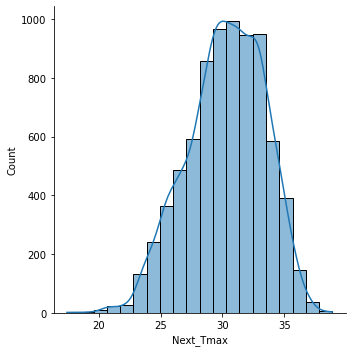

In [30]:
sns.displot(df["Next_Tmax"],bins=20,kde=True)

In [31]:
# The plot can be seen that they are normal distributed

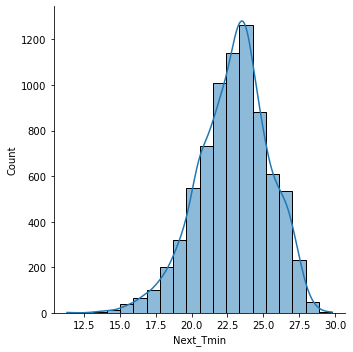

In [32]:
sns.displot(df["Next_Tmin"],bins=20,kde=True)

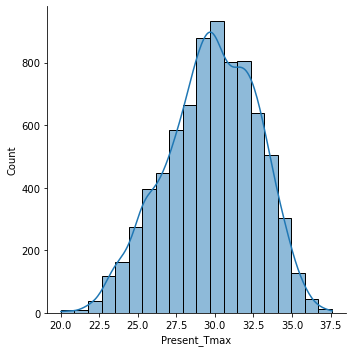

In [33]:
sns.displot(df["Present_Tmax"],bins=20,kde=True)

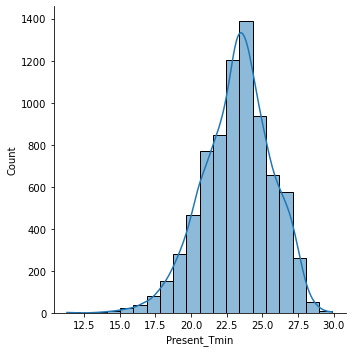

In [34]:
sns.displot(df["Present_Tmin"],bins=20,kde=True)

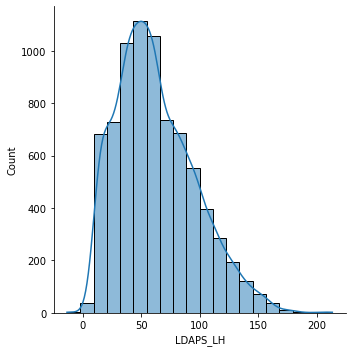

In [35]:
sns.displot(df["LDAPS_LH"],bins=20,kde=True)

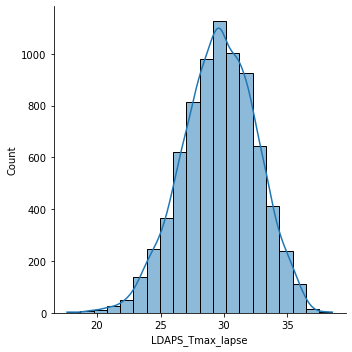

In [36]:
sns.displot(df["LDAPS_Tmax_lapse"],bins=20,kde=True)

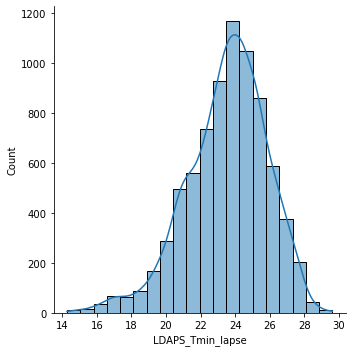

In [37]:
sns.displot(df["LDAPS_Tmin_lapse"],bins=20,kde=True)

In [38]:
# All the plotted distributions are normal distributions.

### Bivariate Analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


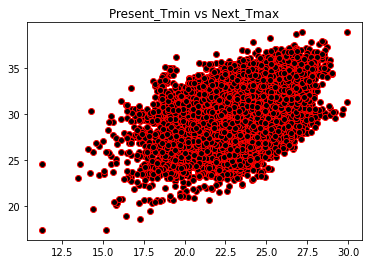

In [39]:
plt.scatter(df["Present_Tmin"],df["Next_Tmax"],alpha=1,c=(0,0,0),edgecolor="r")
plt.title("Present_Tmin vs Next_Tmax")
plt.show()

This shows the scatter plot for target variable VS column Present_Tmin.

In [40]:
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


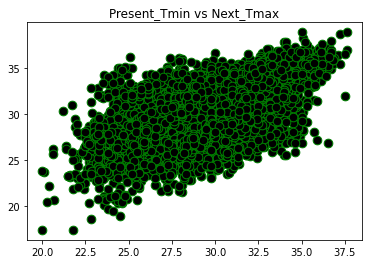

In [41]:
plt.scatter(df["Present_Tmax"],df["Next_Tmax"],c=(0,0,0),cmap='RdYlGn',edgecolor="green",s=75)
plt.title("Present_Tmin vs Next_Tmax")
plt.show()

This shows the scatter plot for target variable VS column Present_Tmax.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


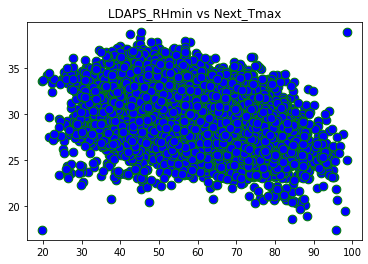

In [42]:
plt.scatter(df["LDAPS_RHmin"],df["Next_Tmax"],c=(0,0,1),cmap='RdYlGn',edgecolor="green",s=75)
plt.title("LDAPS_RHmin vs Next_Tmax")
plt.show()

This shows the scatter plot for target variable VS column LDAPS_RHmin.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


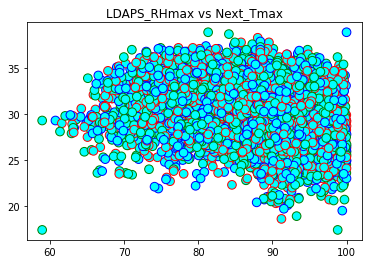

In [43]:
plt.scatter(df["LDAPS_RHmax"],df["Next_Tmax"],c=(0,1,1),cmap='RdYlGn',edgecolor="rgb",s=75)
plt.title("LDAPS_RHmax vs Next_Tmax")
plt.show()

This shows the scatter plot for target variable VS column LDAPS_RHmax.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


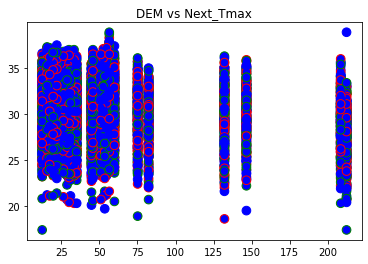

In [44]:
plt.scatter(df["DEM"],df["Next_Tmax"],c=(0,0,1),cmap='RdYlGn',edgecolor="rgb",s=75)
plt.title("DEM vs Next_Tmax")
plt.show()

This shows the scatter plot for target variable VS column DEM.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


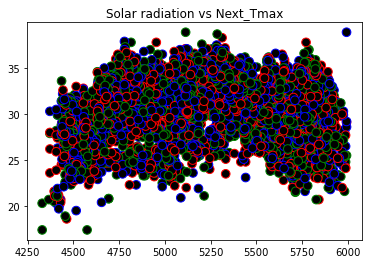

In [45]:
plt.scatter(df["Solar radiation"],df["Next_Tmax"],c=(0,0,0),cmap='RdYlGn',edgecolor="rgb",s=75)
plt.title("Solar radiation vs Next_Tmax")
plt.show()

This shows the scatter plot for target variable VS column Solar radiation.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


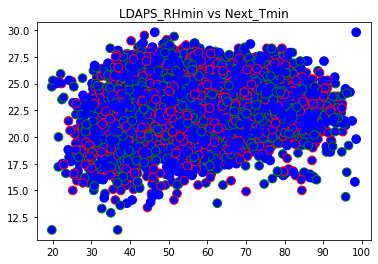

In [46]:
plt.scatter(df["LDAPS_RHmin"],df["Next_Tmin"],c=(0,0,1),cmap='RdYlGn',edgecolor="rgb",s=75)
plt.title("LDAPS_RHmin vs Next_Tmin")
plt.show()

This shows the scatter plot for target variable VS column LDAPS_RHmin.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


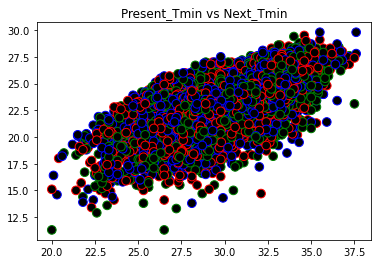

In [47]:
plt.scatter(df["Present_Tmax"],df["Next_Tmin"],c=(0,0,0),cmap='RdYlGn',edgecolor="rgb",s=75)
plt.title("Present_Tmin vs Next_Tmin")
plt.show()

This shows the scatter plot for target variable VS column Present_Tmax.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


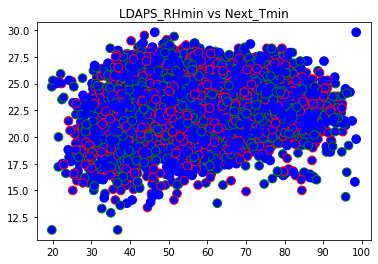

In [48]:
plt.scatter(df["LDAPS_RHmin"],df["Next_Tmin"],c=(0,0,1),cmap='RdYlGn',edgecolor="rgb",s=75)
plt.title("LDAPS_RHmin vs Next_Tmin")
plt.show()

This shows the scatter plot for target variable VS column LDAPS_RHmin.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


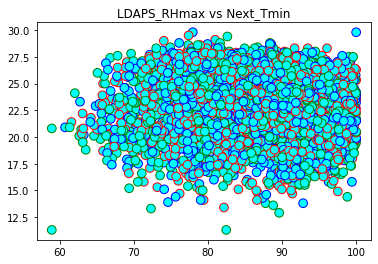

In [49]:
plt.scatter(df["LDAPS_RHmax"],df["Next_Tmin"],c=(0,1,1),cmap='RdYlGn',edgecolor="rgb",s=75)
plt.title("LDAPS_RHmax vs Next_Tmin")
plt.show()

This shows the scatter plot for target variable VS column LDAPS_RHmax.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


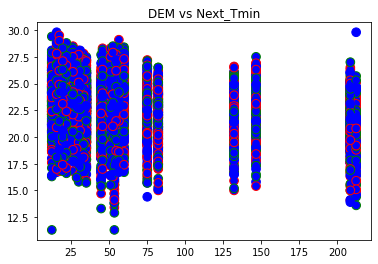

In [50]:
plt.scatter(df["DEM"],df["Next_Tmin"],c=(0,0,1),cmap='RdYlGn',edgecolor="rgb",s=75)
plt.title("DEM vs Next_Tmin")
plt.show()

This shows the scatter plot for target variable VS column DEM.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


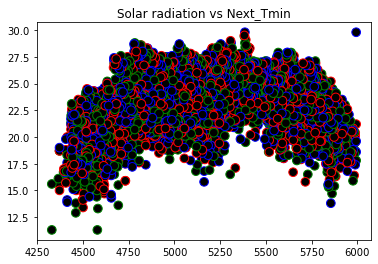

In [51]:
plt.scatter(df["Solar radiation"],df["Next_Tmin"],c=(0,0,0),cmap='RdYlGn',edgecolor="rgb",s=75)
plt.title("Solar radiation vs Next_Tmin")
plt.show()

This shows the scatter plot for target variable VS column Solar radiation.

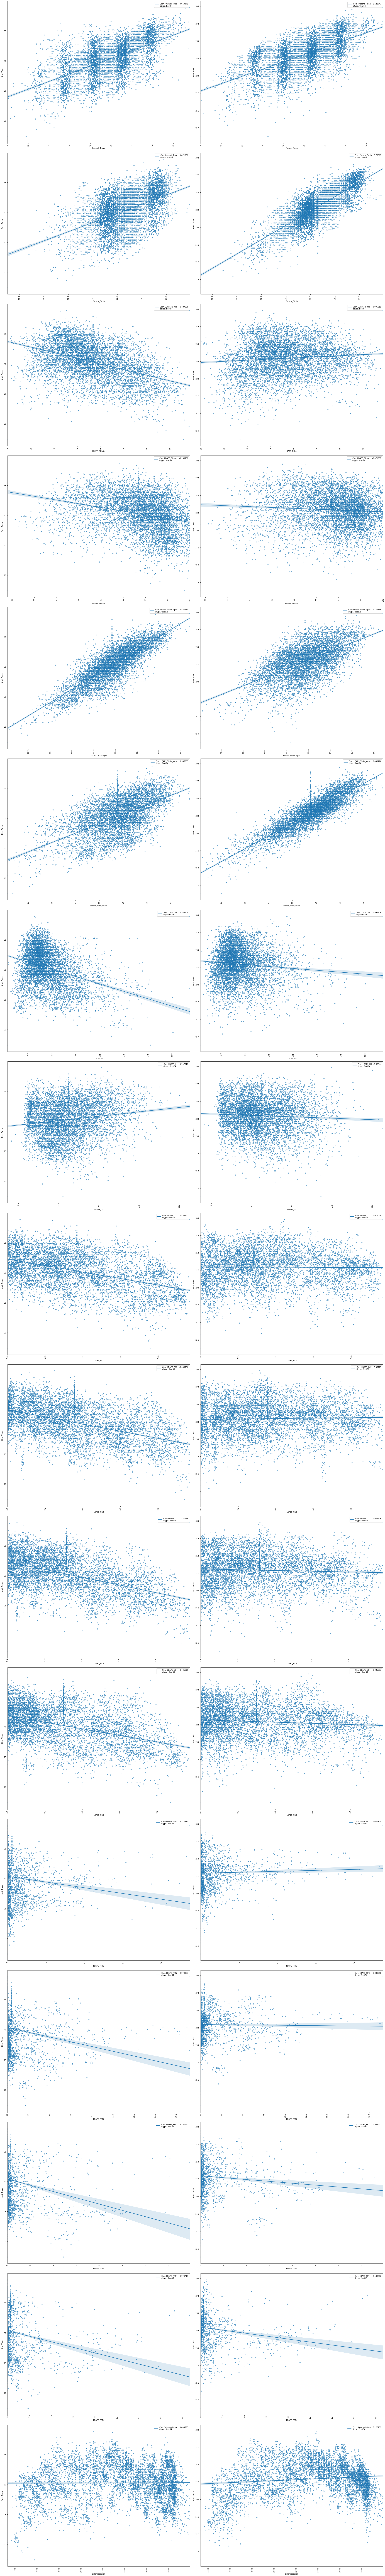

In [52]:
plt.figure(figsize=(30,200))
c=1
for i in columns[0:]:
    for j in ['Next_Tmax','Next_Tmin']:
        plt.subplot(17,2,c)
        c=c+1
        sns.regplot(x=i,y=j,data=df,marker='+')
        plt.legend( ['Corr: '+str(pd.DataFrame(df[i]).corrwith(df[j]) )] )
        plt.xticks(rotation=90)
plt.tight_layout()
   

In [53]:
# PResent Tmax, Tmin show positive corelation with next TMax , Tmin
# LDAPS RH MAx, min has scattered values all over for next tmax, Min.
# LDAPS RH min has negative corelation with next TMAx
#  LDAPS_WS withNext_Tmax moderate negative correlation.
# Ldaps_tmin_lapse positive strong correlation with next_tmin and next_tmax.
# LDAPS LH, Ldaps_CC1  has no correlation qith Target Variables.  
# LDAPS ppt1 has no corr with next Tmax and NExt Tmin.
# Ldaps CC4 has moderate negative corr with next Tmax and No corr with Next Tmin.
# CC3,cc2 has moderate corr with Next Tmax. not with Tmin (no corr). 
# Solar raidiation has no corr with Next Tmax and Max Tmin,
# PPt4, ppt3, ppt 2 ldaps have moderate neg corr with max, and no corr with min T Next.

### Multivariate Analysis

In [54]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000e+00      0.112655      0.131646    -0.066733   
Present_Tmax      1.126554e-01      1.000000      0.618760    -0.204571   
Present_Tmin      1.316462e-01      0.618760      1.000000     0.123143   
LDAPS_RHmin      -6.673316e-02     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -1.669845e-01     -0.301787     -0.015140     0.579141   
LDAPS_Tmax_lapse  6.910718e-02      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  1.047582e-01      0.623496      0.762993     0.089476   
LDAPS_WS          5.277000e-03     -0.121820     -0.034675     0.294361   
LDAPS_LH         -1.333566e-01      0.135463     -0.009258    -0.070858   
LDAPS_CC1         6.918787e-03     -0.311805      0.084447     0.613818   
LDAPS_CC2         3.396039e-03     -0.213791      0.090263     0.745443   
LDAPS_CC3         6.940187e-04     -0.144018     -0.002772     0.689679   
LDAPS_CC4         6.126001e-03     -0.140729     -0.044335     0.514075   
LDAPS_PPT1       -2.709482e-03     -0.109006      0.112845     0.262665   
LDAPS_PPT2       -8.249548e-03     -0.099449      0.068176     0.390967   
LDAPS_PPT3       -1.246113e-02     -0.120367     -0.046126     0.240642   
LDAPS_PPT4       -1.040127e-02     -0.099607     -0.062965     0.168595   
lat              -2.375015e-01     -0.052615     -0.078475     0.087099   
lon              -1.187044e-01      0.009020     -0.043461    -0.076237   
DEM              -2.558297e-01     -0.187121     -0.250275     0.102115   
Slope            -9.006090e-02     -0.105809     -0.146339     0.123744   
Solar radiation  -1.900100e-02     -0.025439      0.053578     0.244080   
Next_Tmax         1.079826e-01      0.610348      0.471806    -0.437898   
Next_Tmin         1.282934e-01      0.622741      0.796670     0.095019   
Date_day          3.184397e-17     -0.143807     -0.108272    -0.065837   
Date_month       -2.341773e-17     -0.001151     -0.003434    -0.053940   
Date_year         1.435563e-15      0.059800      0.037396    -0.002045   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166984          0.069107          0.104758  0.005277   
Present_Tmax        -0.301787          0.570129          0.623496 -0.121820   
Present_Tmin        -0.015140          0.464151          0.762993 -0.034675   
LDAPS_RHmin          0.579141         -0.564580          0.089476  0.294361   
LDAPS_RHmax          1.000000         -0.373404         -0.114143  0.135333   
LDAPS_Tmax_lapse    -0.373404          1.000000          0.654021 -0.311996   
LDAPS_Tmin_lapse    -0.114143          0.654021          1.000000 -0.130035   
LDAPS_WS             0.135333         -0.311996         -0.130035  1.000000   
LDAPS_LH             0.238579          0.048010         -0.134761  0.006711   
LDAPS_CC1            0.436652         -0.438439          0.010901  0.289445   
LDAPS_CC2            0.391330         -0.523619          0.047727  0.261090   
LDAPS_CC3            0.226957         -0.541327         -0.044018  0.242991   
LDAPS_CC4            0.130619         -0.429539         -0.080335  0.220533   
LDAPS_PPT1           0.268449         -0.111065          0.038056  0.152587   
LDAPS_PPT2           0.229050         -0.242122          0.000870  0.191886   
LDAPS_PPT3           0.134607         -0.188115         -0.088575  0.161684   
LDAPS_PPT4           0.117853         -0.160273         -0.094655  0.144085   
lat                  0.195798         -0.042093         -0.096257  0.036657   
lon                  0.025667          0.090666         -0.026701 -0.059466   
DEM                  0.177168         -0.178895         -0.195455  0.191053   
Slope                0.219599         -0.162332         -0.185849  0.171629   
Solar radiation      0.149261          0.047971          0.159975  0.121759   
Next_Tmax           -0.283738          0.827189          0.586983 -0.342729   
Next_Tmin           -0.071

<AxesSubplot:>

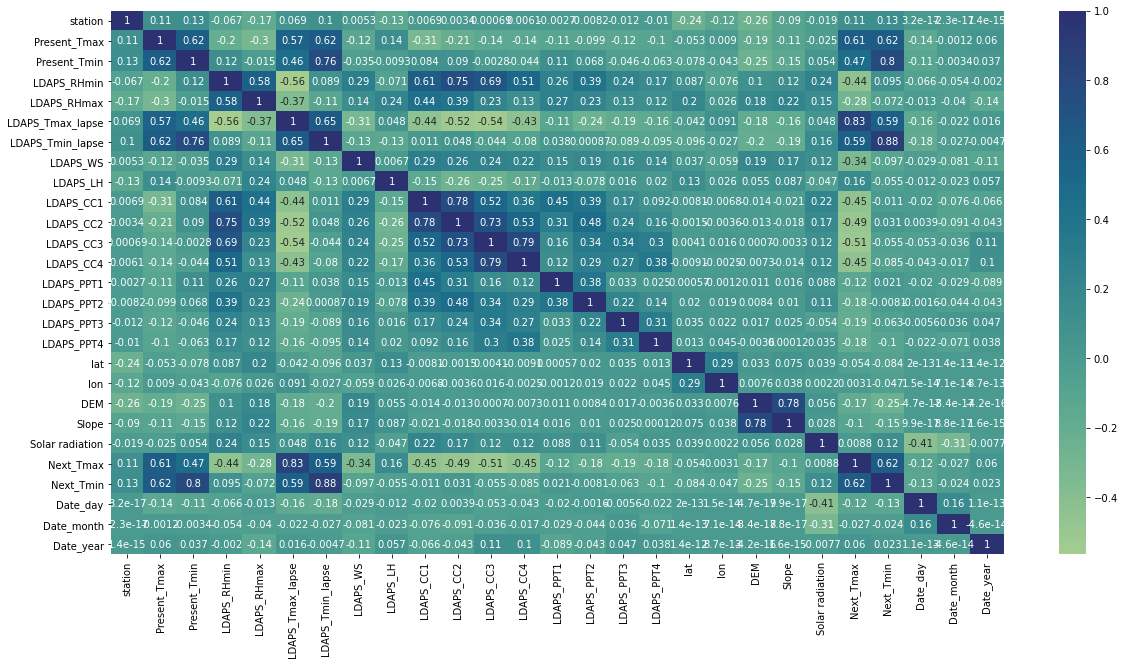

In [55]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="crest")

In [56]:
# From the plot we can see the multicollinearity 
# LDAPS_Tmin_Lapse and LDAPS_Tmax_Lapse are in multiple correlation
# slope and DEM are also in multiple correlation

# As it can be seen that Next_Tmin and Next_Tmax are fully dependent among each other. 

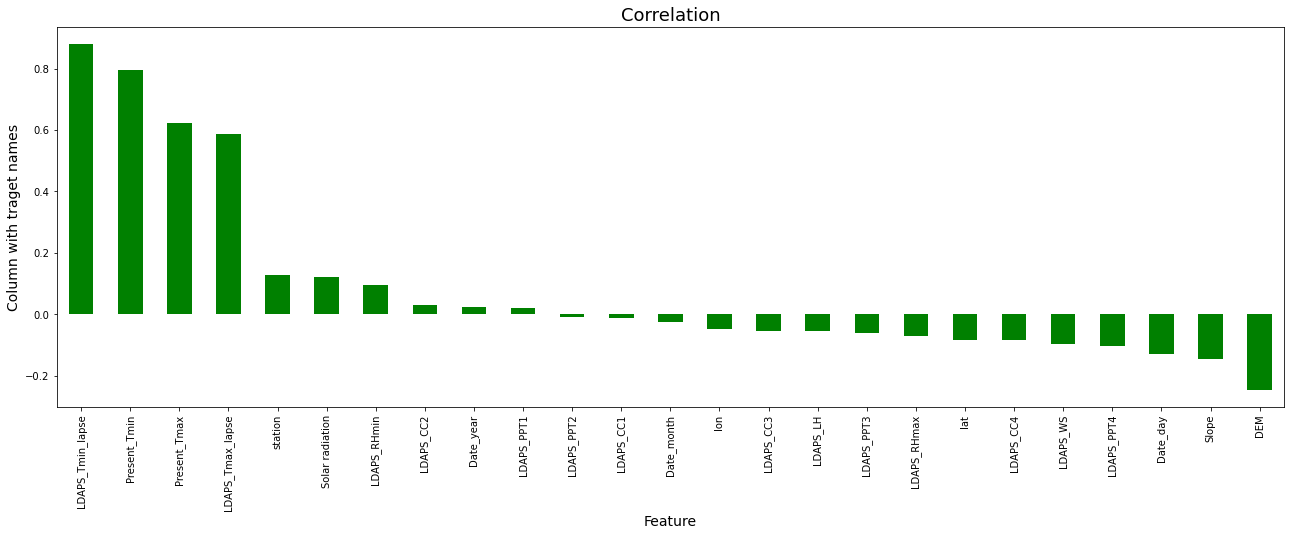

In [57]:
plt.figure(figsize=(22,7))
df.corr()["Next_Tmin"].sort_values(ascending=False).drop(["Next_Tmin","Next_Tmax"]).plot(kind="bar",color="g")
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with traget names",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

### Outlier detection

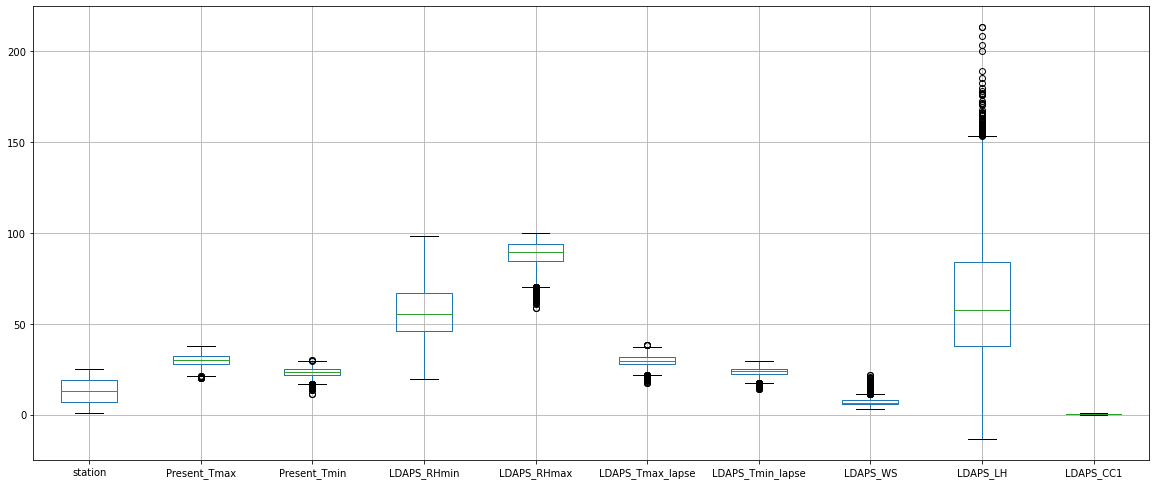

In [58]:
# Plotting boxplots for first 10 columns
df.iloc[:,0:10].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

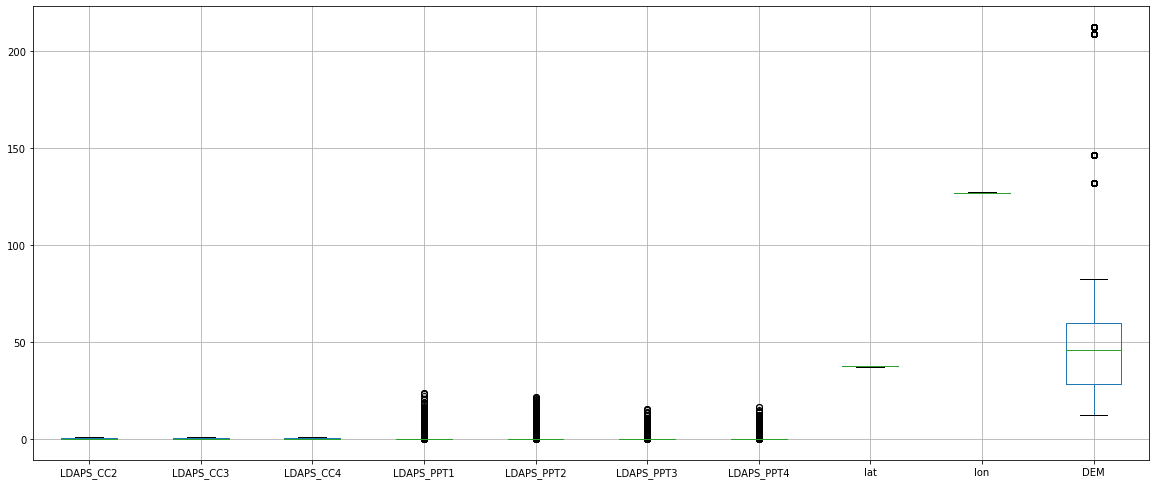

In [59]:
# Plotting boxplots for first 30 columns
df.iloc[:,10:20].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

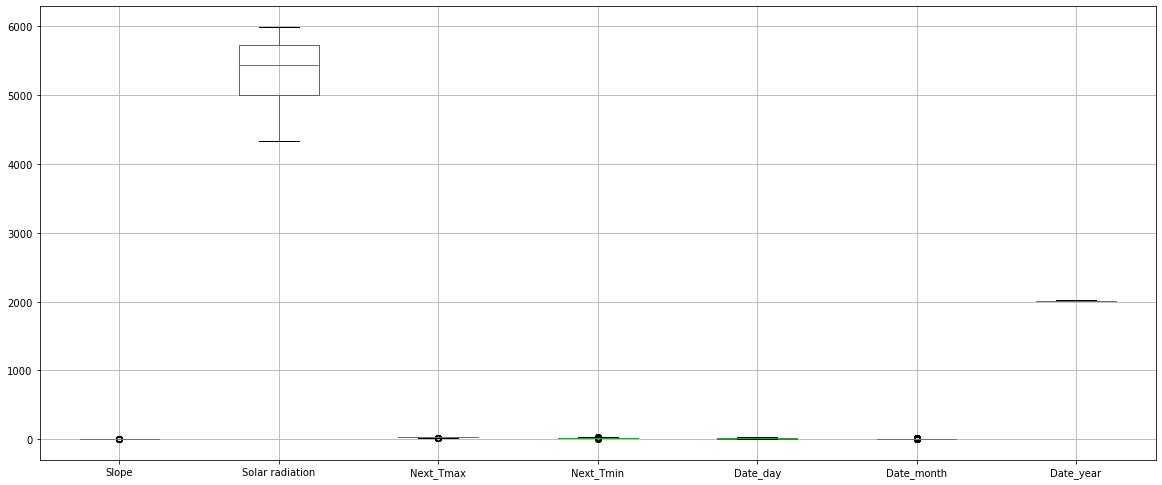

In [60]:
# Plotting boxplots for first 30 columns
df.iloc[:,20:30].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

### Zscore for removing outliers.

In [61]:
from scipy.stats import zscore

zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))


In [62]:
print("shape before removing the outliers",df.shape)
df_new1=df[(zscr<3).all(axis=1)]
print("shape after removing the outliers",df_new1.shape)

shape before removing the outliers (7752, 27)
shape after removing the outliers (6894, 27)


In [63]:
Dataloss=((7752-6894)/7752)*100
Dataloss

11.06811145510836

In [64]:
# the data loss is 11%

### Checking for skewness

In [65]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Date_day            0.245514
Date_month         -0.705332
Date_year           0.000000
dtype: float64

the data outside of the range are of -0.50 and +0.50 is known skewness

In [66]:
from sklearn.preprocessing import power_transform
df1=power_transform(df)

df1=pd.DataFrame(df1,columns=df.columns)

In [67]:
df1.skew()

station            -0.204565
Present_Tmax       -0.035006
Present_Tmin       -0.012048
LDAPS_RHmin        -0.017469
LDAPS_RHmax        -0.115143
LDAPS_Tmax_lapse   -0.009351
LDAPS_Tmin_lapse   -0.017827
LDAPS_WS            0.002408
LDAPS_LH            0.057403
LDAPS_CC1           0.046757
LDAPS_CC2           0.045326
LDAPS_CC3           0.087933
LDAPS_CC4           0.126895
LDAPS_PPT1          1.404189
LDAPS_PPT2          1.577808
LDAPS_PPT3          1.747820
LDAPS_PPT4          1.963848
lat                 0.000000
lon                -0.198429
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Next_Tmax          -0.038540
Next_Tmin          -0.013745
Date_day           -0.041879
Date_month          0.043842
Date_year          -0.000215
dtype: float64

In [68]:
# Some of the skewness of the data is removed.

### DATA MODELLING

In [69]:
y_max = df['Next_Tmax']
y_min = df['Next_Tmin']
x_max = df.drop('Next_Tmax',axis=1 )
x_min = df.drop('Next_Tmin',axis=1 )
x = df.drop(['Next_Tmax','Next_Tmin'],axis=1 )
y = df[['Next_Tmax','Next_Tmin']]

In [70]:
# Importing required libraries.

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [71]:
#function to find best random state for any model

def random_state_func(model,x,y):
    
    randomstate = 0
    max_score = 0
    
    for i in range(1,50):
        x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=.30,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = r2_score(y_test,pred)    
        if(score>max_score):
            max_score = score
            randomstate  = i
            
    return(randomstate,max_score)

In [72]:
cv_scores = []
r2_scores = []
rmse = []


In [73]:
# Method to for algorithm prediction for any model.

def model_predict(model,randomstate,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=randomstate)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    cv_score = np.mean(cross_val_score(model,x,y,cv=10,scoring='r2'))
     
    print('------------',model,'--------------')
    print(' R2 Score              : ', r2_score(y_test,predictions))
    print('Cross Validation Score : ',cv_score)
    print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,predictions)))
    print('Absolute Mean Square   :', mean_absolute_error(y_test,predictions))
    
    
  
    r2_scores.append(r2_score(y_test,predictions))
    cv_scores.append(cv_score)
    rmse.append(np.sqrt(mean_squared_error(y_test,predictions)))
    
    
    plt.figure(figsize=(6,5))
    
    sns.regplot(y_test,predictions,color='green',)
    plt.xlabel('Y_True')
    plt.ylabel('Y_predicted')
    plt.show()    

### LINEAR REGRESSION

In [74]:
rs,score = random_state_func(LinearRegression(),x_max,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(LinearRegression(),x_min,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

Random State :  40  with r2 score : 0.8065397813767902
Random State :  36  with r2 score : 0.8578262819128439


------------ LinearRegression() --------------
 R2 Score              :  0.8051938455631183
Cross Validation Score :  0.6759943972933783
Root Mean Squared Error : 1.3980632332900287
Absolute Mean Square   : 1.0607293417005426


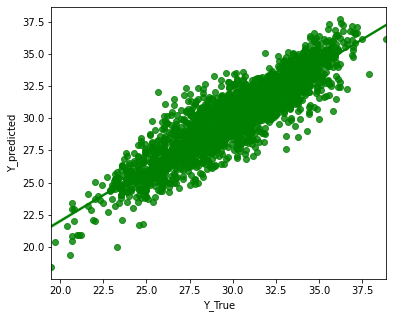

In [75]:
model_predict(LinearRegression(),rs,x_max,y_max)

------------ LinearRegression() --------------
 R2 Score              :  0.8564360614157882
Cross Validation Score :  0.7554519755440137
Root Mean Squared Error : 0.9530838270859743
Absolute Mean Square   : 0.7535211991057985


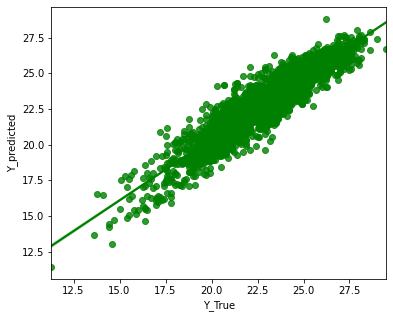

In [76]:
model_predict(LinearRegression(),rs1,x_min,y_min)

### RIDGE

Random State :  40  with r2 score : 0.8065458538932284
Random State :  36  with r2 score : 0.8578545511188846


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ Ridge() --------------
 R2 Score              :  0.8052266002113079
Cross Validation Score :  0.6760735338599977
Root Mean Squared Error : 1.397945693383357
Absolute Mean Square   : 1.0606691908206063


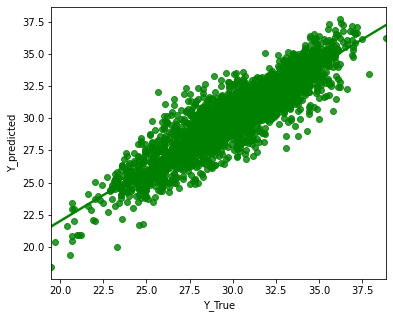


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ Ridge() --------------
 R2 Score              :  0.8564692129518007
Cross Validation Score :  0.7555700681334067
Root Mean Squared Error : 0.9529737784993542
Absolute Mean Square   : 0.7533553799075142


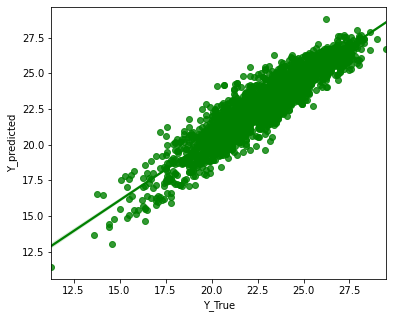

In [77]:
rs,score = random_state_func(Ridge(),x_max,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(Ridge(),x_min,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(Ridge(),rs,x_max,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(Ridge(),rs1,x_min,y_min)

### LASSO

Random State :  40  with r2 score : 0.7420366979710498
Random State :  4  with r2 score : 0.8115325755264104


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ Lasso() --------------
 R2 Score              :  0.7379232305849748
Cross Validation Score :  0.6106766322438455
Root Mean Squared Error : 1.6215850856600125
Absolute Mean Square   : 1.2551879381415967


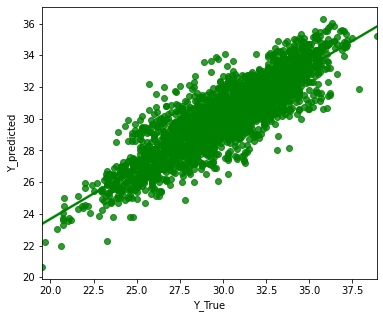


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ Lasso() --------------
 R2 Score              :  0.811301132083388
Cross Validation Score :  0.7106844003939444
Root Mean Squared Error : 1.082227779151955
Absolute Mean Square   : 0.8536564538971436


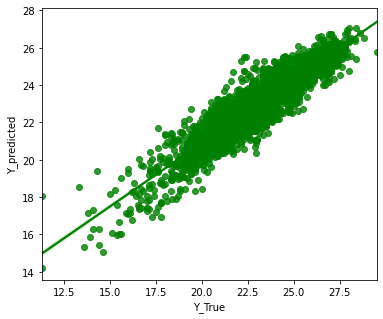

In [78]:
rs,score = random_state_func(Lasso(),x_max,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(Lasso(),x_min,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(Lasso(),rs,x_max,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(Lasso(),rs1,x_min,y_min)

### SVR

Random State :  17  with r2 score : 0.052641708973485746
Random State :  43  with r2 score : 0.1251193293394709


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ SVR() --------------
 R2 Score              :  0.05021199403187682
Cross Validation Score :  -0.2306195621806994
Root Mean Squared Error : 3.036654430430954
Absolute Mean Square   : 2.4767524110869426


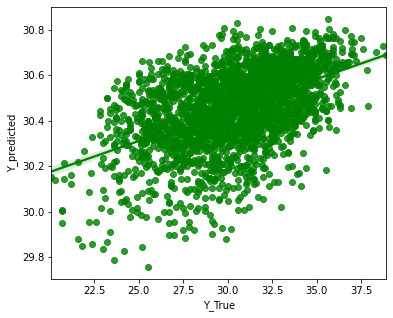


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ SVR() --------------
 R2 Score              :  0.1198820208574658
Cross Validation Score :  -0.11693701619266987
Root Mean Squared Error : 2.3238807436584614
Absolute Mean Square   : 1.8294714555365932


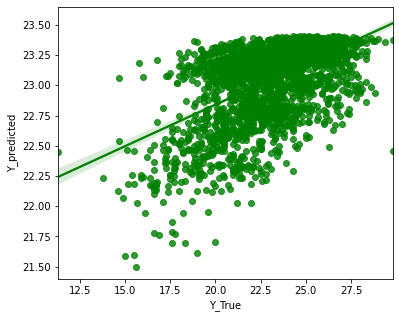

In [79]:
rs,score = random_state_func(SVR(),x_max,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(SVR(),x_min,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(SVR(),rs,x_max,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(SVR(),rs1,x_min,y_min)

#### The results for SVR is not promising, we can't use this model.

### DECISION TREE 

Random State :  48  with r2 score : 0.8075581452374165
Random State :  40  with r2 score : 0.8151787397669128


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ DecisionTreeRegressor() --------------
 R2 Score              :  0.802104887961851
Cross Validation Score :  0.32772466254630095
Root Mean Squared Error : 1.4104545357571945
Absolute Mean Square   : 0.9903379784022631


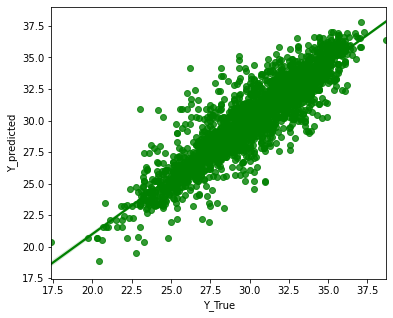


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ DecisionTreeRegressor() --------------
 R2 Score              :  0.8053436133123514
Cross Validation Score :  0.5017091027661413
Root Mean Squared Error : 1.0862761307922684
Absolute Mean Square   : 0.796379663880637


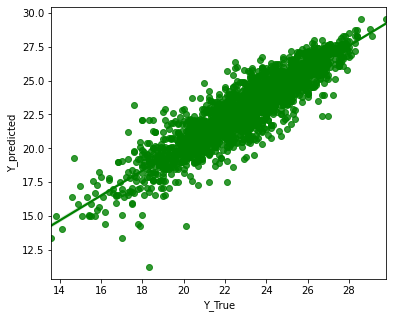

In [80]:
rs,score = random_state_func(DecisionTreeRegressor(),x_max,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(DecisionTreeRegressor(),x_min,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(DecisionTreeRegressor(),rs,x_max,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(DecisionTreeRegressor(),rs1,x_min,y_min)

##### DECISION TREE error is large which shows that this model.


### EMSEMBLE TECHNIQUES:

   #### RAMDOM FOREST

Random State :  24  with r2 score : 0.9199305139562991
Random State :  36  with r2 score : 0.9170271249269766


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ RandomForestRegressor() --------------
 R2 Score              :  0.9167155269565264
Cross Validation Score :  0.6488872898696545
Root Mean Squared Error : 0.9138934554457144
Absolute Mean Square   : 0.6862436188792393


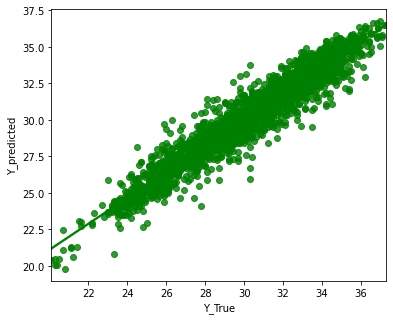


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ RandomForestRegressor() --------------
 R2 Score              :  0.9125758980699163
Cross Validation Score :  0.7397878055071072
Root Mean Squared Error : 0.7437449119517338
Absolute Mean Square   : 0.5585272772662258


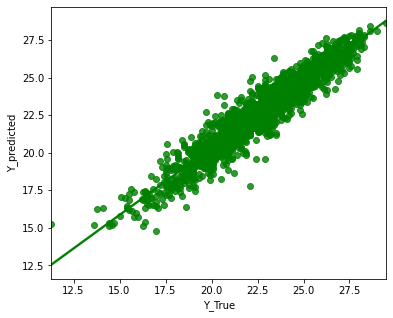

In [81]:
rs,score = random_state_func(RandomForestRegressor(),x_max,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(RandomForestRegressor(),x_min,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(RandomForestRegressor(),rs,x_max,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(RandomForestRegressor(),rs1,x_min,y_min)

Random State :  9  with r2 score : 0.9357072071520637
Random State :  12  with r2 score : 0.9413104231610937


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) --------------
 R2 Score              :  0.9302922696437105
Cross Validation Score :  0.6476508633132283
Root Mean Squared Error : 0.8295027418179395
Absolute Mean Square   : 0.6386090402726132


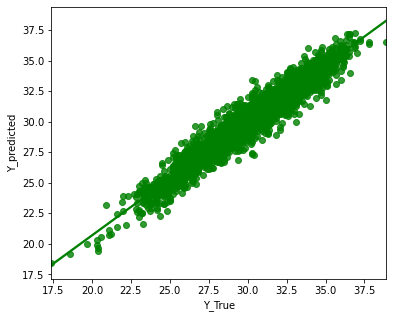


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) --------------
 R2 Score              :  0.9358192120659845
Cross Validation Score :  0.7087303952819047
Root Mean Squared Error : 0.638502997825103
Absolute Mean Square   : 0.4737494635424452


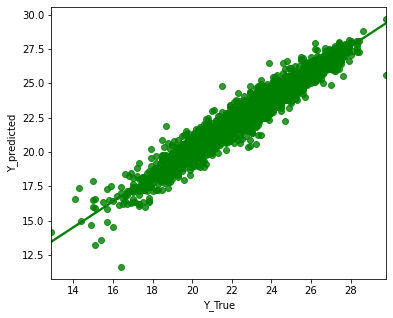

In [82]:
rs,score = random_state_func(XGBRegressor(),x_max,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(XGBRegressor(),x_min,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(XGBRegressor(),rs,x_max,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(XGBRegressor(),rs1,x_min,y_min)

In [106]:
error = []
for i in range(0,14):
    error.append(np.abs(r2_scores[i] - cv_scores[i]))

In [107]:
r2_max = []
r2_min = []
rmse_max = []
rmse_min = []
err_max = []
cv_max = []
cv_min = []
err_min = []
for i in range(0,14):
    if(i%2==0):
        r2_max.append(r2_scores[i])
        rmse_max.append(rmse[i])
        err_max.append(error[i])
        cv_max.append(cv_scores[i])
    else:
        r2_min.append(r2_scores[i])
        rmse_min.append(rmse[i])
        err_min.append(error[i])
        cv_min.append(cv_scores[i])
        
    

In [108]:
table_dict_max = {
    'R2 SCORE: ':r2_max,
    
    'CV SCORE': cv_max,
    'RMSE ': rmse_max,
    'Bias/Error': err_max
}
table_dict_min = {
    'R2 SCORE: ':r2_min,
    
    'CV SCORE': cv_min,
    'RMSE ': rmse_min,
    'Bias/Error': err_min
}

In [109]:
score_max = pd.DataFrame(table_dict_max,index=['LR_MAX_T','Rd_MAX_T','Lasso_MAX_T','SVR_MAX_T','DTC_MAX_T',
                                             'RF_MAX_T','XGB_MAX_T' ])

score_min = pd.DataFrame(table_dict_min,index=['LR_MIN_T','Rd_MIN_T','Lasso_MIN_T','SVR_MIN_T','DTC_MIN_T',
                                             'RF_MIN_T','XGB_MIN_T'  ])

In [110]:
 score_max

R2 SCORE:   CV SCORE     RMSE   Bias/Error
LR_MAX_T       0.805194  0.675994  1.398063    0.129199
Rd_MAX_T       0.805227  0.676074  1.397946    0.129153
Lasso_MAX_T    0.737923  0.610677  1.621585    0.127247
SVR_MAX_T      0.050212 -0.230620  3.036654    0.280832
DTC_MAX_T      0.802105  0.327725  1.410455    0.474380
RF_MAX_T       0.916716  0.648887  0.913893    0.267828
XGB_MAX_T      0.930292  0.647651  0.829503    0.282641

In [111]:
score_min

R2 SCORE:   CV SCORE     RMSE   Bias/Error
LR_MIN_T       0.856436  0.755452  0.953084    0.100984
Rd_MIN_T       0.856469  0.755570  0.952974    0.100899
Lasso_MIN_T    0.811301  0.710684  1.082228    0.100617
SVR_MIN_T      0.119882 -0.116937  2.323881    0.236819
DTC_MIN_T      0.805344  0.501709  1.086276    0.303635
RF_MIN_T       0.912576  0.739788  0.743745    0.172788
XGB_MIN_T      0.935819  0.708730  0.638503    0.227089

### HYPERTUNING RIDGE MODEL FOR Next TMAX and NEXT TMin

In [112]:
params = {
        'alpha': [.1,.2,.5,.01,.05,1,2],
    'solver':[ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    
}
grid = RandomizedSearchCV(Ridge(),params,cv=10,n_iter=20,scoring='r2')

In [113]:
grid.fit(x_max,y_max)

RandomizedSearchCV(cv=10, estimator=Ridge(), n_iter=20,
                   param_distributions={'alpha': [0.1, 0.2, 0.5, 0.01, 0.05, 1,
                                                  2],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   scoring='r2')

In [114]:
grid.best_estimator_

Ridge(alpha=0.01, solver='sparse_cg')

Random State :  40  with r2 score : 0.8065458538932284


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ Ridge(alpha=0.01, solver='saga') --------------
 R2 Score              :  0.7727004115622764
Cross Validation Score :  0.6481755986571285
Root Mean Squared Error : 1.5101663978038495
Absolute Mean Square   : 1.1546122004469164


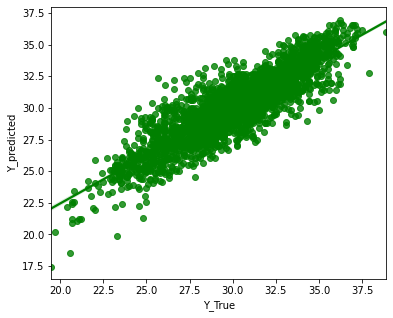

In [115]:
rs,score = random_state_func(Ridge(),x_max,y_max)
print('Random State : ', rs , ' with r2 score :',score)


print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(Ridge(alpha=.01, solver='saga'),rs,x_max,y_max)


#### HYPER TUNE TMIN

In [116]:
params = {
        'alpha': [.1,.2,.5,.01,.05,1,2],
    'solver':[ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    
}
grid = RandomizedSearchCV(Ridge(),params,cv=10,n_iter=30,scoring='r2')


In [117]:

grid.fit(x_min,y_min)

grid.best_estimator_

Ridge(alpha=2, solver='sparse_cg')

Random State :  36  with r2 score : 0.8578545511188846


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ Ridge(alpha=0.01, solver='sag') --------------
 R2 Score              :  0.8538751242915285
Cross Validation Score :  0.7570982511692506
Root Mean Squared Error : 0.9615469513073432
Absolute Mean Square   : 0.7598552958002404


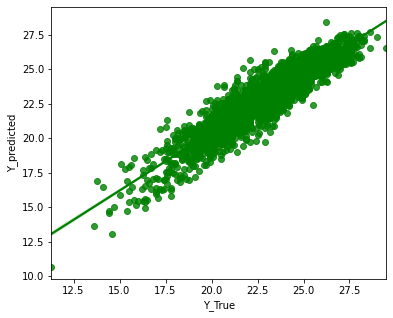

In [118]:
rs,score = random_state_func(Ridge(),x_min,y_min)
print('Random State : ', rs , ' with r2 score :',score)


print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(Ridge(alpha=0.01, solver='sag'),rs,x_min,y_min)


#### EVALUATING TMAX MODEL:

In [119]:
model = Ridge(alpha=.01, solver='saga')
x_train,x_test,y_train,y_test = train_test_split(x_max,y_max,test_size=.33,random_state=43)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
cv_score = np.mean(cross_val_score(model,x_max,y_max,cv=10,scoring='r2'))
     
print('\n------------',model,'--------------')
print('\n R2 Score              : ', r2_score(y_test,predictions))
print('\nCross Validation Score : ',cv_score)
print('\nRoot Mean Squared Error :',np.sqrt(mean_squared_error(y_test,predictions)))
print('\nAbsolute Mean Square   :', mean_absolute_error(y_test,predictions))
err = np.abs(r2_score(y_test,predictions) - cv_score)
print('\nError (validation score - training score)    :'    , err)  


------------ Ridge(alpha=0.01, solver='saga') --------------

 R2 Score              :  0.7661534464898134

Cross Validation Score :  0.6481586268925689

Root Mean Squared Error : 1.515470748776157

Absolute Mean Square   : 1.1715818562361153

Error (validation score - training score)    : 0.11799481959724456


In [120]:
# distribution of Error (difference btw y_true and y_predicted should follow gaussian structure)

#### Error variance follow standard normalized structure, suggesting that  the model is not overfitting.

### EVALUATING MODEL FOR TMIN NEXT TARGET VARIABLE

In [121]:
model1 = Ridge(alpha=0.01, solver='sag')
x_train,x_test,y_train,y_test = train_test_split(x_min,y_min,test_size=.33,random_state=43)
model1.fit(x_train,y_train)
predictions = model1.predict(x_test)
cv_score = np.mean(cross_val_score(model1,x_min,y_min,cv=10,scoring='r2'))
     
print('\n------------',model,'--------------')
print('\n R2 Score              : ', r2_score(y_test,predictions))
print('\nCross Validation Score : ',cv_score)
print('\nRoot Mean Squared Error :',np.sqrt(mean_squared_error(y_test,predictions)))
print('\nAbsolute Mean Square   :', mean_absolute_error(y_test,predictions))
err = np.abs(r2_score(y_test,predictions) - cv_score)
print('\nError (validation score - training score)    :'    , err)


------------ Ridge(alpha=0.01, solver='saga') --------------

 R2 Score              :  0.8386564868743219

Cross Validation Score :  0.7571017382287177

Root Mean Squared Error : 0.994990983849193

Absolute Mean Square   : 0.7839818345278804

Error (validation score - training score)    : 0.08155474864560419


## Saving Model

In [122]:
import joblib
joblib.dump(model1, 'tmin_ridge.pkl')

['tmin_ridge.pkl']

In [123]:
joblib.dump(model1, 'tmax_ridge.pkl')

['tmax_ridge.pkl']